# End-to-end Machine Learning project

The best way to learning any programming language or new concept is to do hands-on on that. Let's start with buidling machine learning model

## Problem Statement




## Dataset

This dataset is public available for research. The details are described in Cortez and Morais, 2007.

It is located at `/cxldata/datasets/bootml/Forest_Fires_Data_Set`

# Get the data

In [51]:
import pandas as pd
import os

DATASET_PATH = '/cxldata/datasets/bootml/Forest_Fires_Data_Set'
def load_dataset_data(dataset_path=DATASET_PATH): 
    csv_path = os.path.join(dataset_path, "forestfires.csv") 
    return pd.read_csv(csv_path)

In [52]:
Forest_Fires_Dataset = load_dataset_data()
Forest_Fires_Dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


The relevant attributes in forestfires.csv are : 

X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area, 



## Know your data

In [53]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

Forest_Fires_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [54]:
# Find out what categories exist for the categorical fields by using the value_counts() method
# And let's drop the rows which has missing categoical value

for x in ['month','day', ]:
    Forest_Fires_Dataset.dropna(subset=[x], how='all', inplace = True)
    print (x)
    print (Forest_Fires_Dataset[x].value_counts())

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64
day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


In [55]:
Forest_Fires_Dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [56]:
# Let's look at the numerical fields.
# The describe() method shows a summary of the numerical attributes

Forest_Fires_Dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


The count, mean, min and max rows are self-explanatory.

**std** rows shows the standard deviation (which measures how dispersed the values are)

** 25%, 50%, 75% ** shows the corresponding percentiles

** Points to Note**

1. ** 25th percentile is called 1st quartile ** 
2. ** 50th percentile is called median ** 
3. ** 75th percentile is called 3rd quartile ** 

## Plot histogram

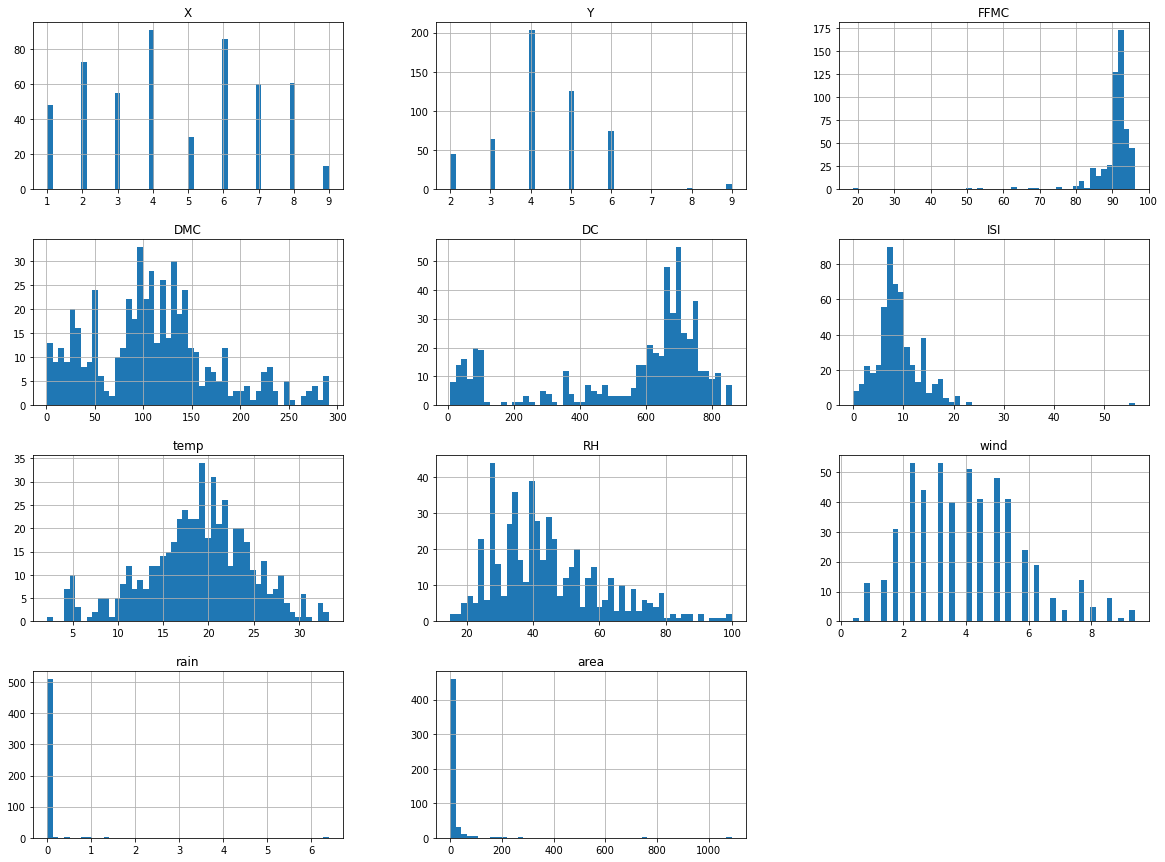

In [57]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres

%matplotlib inline
import matplotlib.pyplot as plt
Forest_Fires_Dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Split dataset into test and training set

In [58]:
# To make this notebook's output identical at every run

import numpy as np

np.random.seed(42)

In [59]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Forest_Fires_Dataset, test_size=0.2, random_state=42)

print ("Length of train set is", len(train_set))
print ("Length of test set is", len(test_set))


Length of train set is 413
Length of test set is 104


In [60]:
Forest_Fires_Dataset = train_set.copy()
Forest_Fires_Dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
329,4,3,sep,sat,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33
173,4,4,sep,mon,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0,3.07
272,2,5,aug,tue,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0,14.68
182,5,4,feb,sun,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0,6.38


# Discover and visualize the data to gain insights

<AxesSubplot:xlabel='X', ylabel='X'>

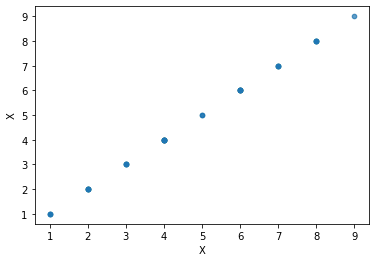

In [61]:
Forest_Fires_Dataset.plot(kind="scatter", x="X", y="X", alpha=0.1)

# Generate correlations

In [62]:
corr_matrix = Forest_Fires_Dataset.corr()
corr_matrix

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.529508,-0.037199,-0.034402,-0.099985,-0.039236,-0.069575,0.131535,0.032861,0.068566,0.097316
Y,0.529508,1.000000,-0.038022,0.029582,-0.085578,0.015593,0.011271,0.045170,-0.015438,0.036829,0.064545
FFMC,-0.037199,-0.038022,1.000000,0.369869,0.318263,0.580653,0.413136,-0.295827,-0.027535,0.055683,0.048985
DMC,-0.034402,0.029582,0.369869,1.000000,0.683103,0.363387,0.442685,0.097735,-0.078025,0.067075,0.115296
DC,-0.099985,-0.085578,0.318263,0.683103,1.000000,0.292579,0.475584,-0.019278,-0.192572,0.028957,0.048709
ISI,-0.039236,0.015593,0.580653,0.363387,0.292579,1.000000,0.427872,-0.132449,0.123776,0.092557,0.037799
temp,-0.069575,0.011271,0.413136,0.442685,0.475584,0.427872,1.000000,-0.546717,-0.222612,0.073452,0.100529
RH,0.131535,0.045170,-0.295827,0.097735,-0.019278,-0.132449,-0.546717,1.000000,0.103825,0.087408,-0.057473
wind,0.032861,-0.015438,-0.027535,-0.078025,-0.192572,0.123776,-0.222612,0.103825,1.000000,0.047322,0.012684
rain,0.068566,0.036829,0.055683,0.067075,0.028957,0.092557,0.073452,0.087408,0.047322,1.000000,-0.005113


In [63]:
for x in ['area', ]:
    print (corr_matrix[x])

X       0.097316
Y       0.064545
FFMC    0.048985
DMC     0.115296
DC      0.048709
ISI     0.037799
temp    0.100529
RH     -0.057473
wind    0.012684
rain   -0.005113
area    1.000000
Name: area, dtype: float64


In [64]:
for x in ['area', ]:
    print (corr_matrix[x].sort_values(ascending=False))

area    1.000000
DMC     0.115296
temp    0.100529
X       0.097316
Y       0.064545
FFMC    0.048985
DC      0.048709
ISI     0.037799
wind    0.012684
rain   -0.005113
RH     -0.057473
Name: area, dtype: float64


# Generate scatter matrix

array([[<AxesSubplot:xlabel='X', ylabel='X'>,
        <AxesSubplot:xlabel='Y', ylabel='X'>,
        <AxesSubplot:xlabel='FFMC', ylabel='X'>,
        <AxesSubplot:xlabel='DMC', ylabel='X'>,
        <AxesSubplot:xlabel='DC', ylabel='X'>,
        <AxesSubplot:xlabel='ISI', ylabel='X'>,
        <AxesSubplot:xlabel='temp', ylabel='X'>,
        <AxesSubplot:xlabel='RH', ylabel='X'>,
        <AxesSubplot:xlabel='wind', ylabel='X'>,
        <AxesSubplot:xlabel='rain', ylabel='X'>,
        <AxesSubplot:xlabel='area', ylabel='X'>],
       [<AxesSubplot:xlabel='X', ylabel='Y'>,
        <AxesSubplot:xlabel='Y', ylabel='Y'>,
        <AxesSubplot:xlabel='FFMC', ylabel='Y'>,
        <AxesSubplot:xlabel='DMC', ylabel='Y'>,
        <AxesSubplot:xlabel='DC', ylabel='Y'>,
        <AxesSubplot:xlabel='ISI', ylabel='Y'>,
        <AxesSubplot:xlabel='temp', ylabel='Y'>,
        <AxesSubplot:xlabel='RH', ylabel='Y'>,
        <AxesSubplot:xlabel='wind', ylabel='Y'>,
        <AxesSubplot:xlabel='rain', ylabel=

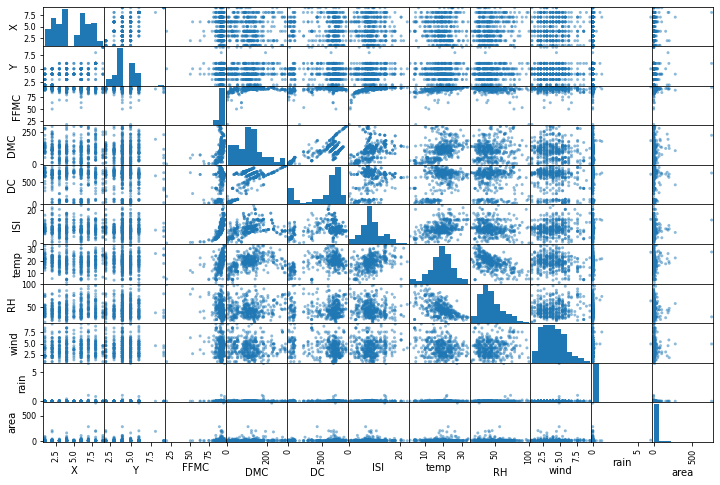

In [65]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
# Decrease the number of numerical attributes in the for loop below to get a clear picture in the matrices

from pandas.plotting import scatter_matrix

x = 0
attributes = []
for x in ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area', ]:
    attributes.append(x)
scatter_matrix(Forest_Fires_Dataset[attributes], figsize=(12, 8))

In [66]:
Forest_Fires_Dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,4.661017,4.322034,90.533414,112.178692,549.813075,8.773123,18.887167,44.554479,3.997094,0.021792,11.132131
std,2.294222,1.208957,5.953240,65.814101,249.214533,3.897980,5.790388,16.590003,1.783362,0.321721,45.658548
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.900000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,70.800000,437.700000,6.400000,15.500000,32.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.400000,664.500000,8.400000,19.100000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,92.900000,142.400000,715.100000,10.600000,22.800000,53.000000,5.400000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,100.000000,9.400000,6.400000,746.280000


# Prepare the data for Machine Learning algorithms

In [67]:
# Let’s revert to a clean training set

x = 0
for x in ['area', ]:
    Forest_Fires_Dataset = train_set.drop(x, axis=1) # drop label for training set
    Forest_Fires_Dataset_labels = train_set[x].copy()

# Note drop() creates a copy of the data and does not affect train_set

In [68]:
# Let’s experiment with sample dataset for data cleaning

sample_incomplete_rows = Forest_Fires_Dataset[Forest_Fires_Dataset.isnull().any(axis=1)].head()
sample_incomplete_rows

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain


In [69]:
# Let's use Scikit-Learn Imputer class to fill missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [71]:
# Remove the text attributes because Imputer works on numerical attributes

Forest_Fires_Dataset_num = Forest_Fires_Dataset
for x in ['month','day', ]:
    Forest_Fires_Dataset_num = Forest_Fires_Dataset_num.drop(x, axis=1)

Now let's preprocess the categorical fields

In [72]:
# Convert categorical fields to numbers
cat_variables = []
for x in ['month','day', ]:
    cat_variables.append(x)
Forest_Fires_Dataset_cat = Forest_Fires_Dataset[cat_variables]

In [73]:
Forest_Fires_Dataset_cat.head(10)

,month,day
329,sep,sat
173,sep,mon
272,aug,tue
497,aug,tue
182,feb,sun
268,aug,tue
352,sep,fri
117,mar,sat
393,mar,tue
332,sep,sat


In [74]:
# Definition of the CategoricalEncoder class

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [75]:
from sklearn.pipeline import Pipeline
cat_attribs = list(Forest_Fires_Dataset_cat)
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
])


## Feature scaling

In [76]:
# Use Scikit-Learn standard_scaling
num_variables_standardization = []
for x in ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain', ]:
    num_variables_standardization.append(x)
Forest_Fires_Dataset_num_standardization = Forest_Fires_Dataset_num[num_variables_standardization]
Forest_Fires_Dataset_num_standardization.head()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
329,4,3,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0
173,4,4,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0
272,2,5,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0
497,3,4,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0
182,5,4,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0


In [77]:
# Building a pipeline for preprocessing the numerical attributes for StandardScaler:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attribs_standard = list(Forest_Fires_Dataset_num_standardization)
num_pipeline_standard = Pipeline([
    ('selector', DataFrameSelector(num_attribs_standard)),
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])


In [78]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline_standard", num_pipeline_standard),
    ("cat_pipeline", cat_pipeline),
])


In [79]:
Forest_Fires_Dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
329,4,3,sep,sat,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0
173,4,4,sep,mon,90.9,126.5,686.5,7.0,17.7,39,2.2,0.0
272,2,5,aug,tue,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0
497,3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0.0
182,5,4,feb,sun,86.8,15.6,48.3,3.9,12.4,53,2.2,0.0


In [80]:
Forest_Fires_Dataset_prepared = full_pipeline.fit_transform(Forest_Fires_Dataset)
print(Forest_Fires_Dataset_prepared[0])
print(Forest_Fires_Dataset_prepared[1])
print(Forest_Fires_Dataset_prepared[2])

[-0.288472   -1.09485913  0.28028558 -0.15028199  0.81027194 -0.09583835
  0.7976024  -1.05941934  0.00163124 -0.06781709  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  1.          0.          0.          0.          0.        ]
[-0.288472   -0.26669645  0.06165224  0.21786634  0.54913614 -0.45543431
 -0.2052724  -0.33521489 -1.00892252 -0.06781709  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          1.
  0.          0.          0.          0.          0.        ]
[-1.16128472  0.56146622  0.26346763  0.61491887  0.43544163  1.41960174
  0.22700122  0.14758807  0.00163124 -0.06781709  0.          1.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.        ]


In [81]:
Forest_Fires_Dataset_prepared.shape

(413, 29)

# Select and train a model 

In [82]:
# Function to display scores of our alogorithms for cross-validation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [83]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Forest_Fires_Dataset_prepared, Forest_Fires_Dataset_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

Forest_Fires_Dataset_predictions = lin_reg.predict(Forest_Fires_Dataset_prepared)
lin_mse = mean_squared_error(Forest_Fires_Dataset_labels, Forest_Fires_Dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

44.45327410460617

In [85]:
# K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, Forest_Fires_Dataset_prepared, Forest_Fires_Dataset_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 16.79396157  54.45474309  20.60609778  16.93858408  41.23049924
  21.97246638  20.03594328 119.15641167  16.23465441  33.28695881]
Mean: 36.07103203205487
Standard deviation: 30.169037125172274


In [86]:
# Train a model using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(Forest_Fires_Dataset_prepared, Forest_Fires_Dataset_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [87]:
# Calculate RMSE in Decision Tree model
from sklearn.metrics import mean_squared_error

Forest_Fires_Dataset_predictions = tree_reg.predict(Forest_Fires_Dataset_prepared)
tree_mse = mean_squared_error(Forest_Fires_Dataset_labels, Forest_Fires_Dataset_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.6246162986835309

In [88]:
# K-fold Cross Validation for Decision Tree Model
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, Forest_Fires_Dataset_prepared, Forest_Fires_Dataset_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [89]:
display_scores(tree_rmse_scores)

Scores: [ 23.95440406 128.37890638 164.68525822  31.17023545  28.32798134
  39.32490243  58.08476942 123.27078973  44.97520517  54.67809485]
Mean: 69.68505470562135
Standard deviation: 47.453788143249014


In [90]:
# Train a model using Random Forests

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(Forest_Fires_Dataset_prepared, Forest_Fires_Dataset_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [91]:
# Calculate RMSE in Random Forest model
from sklearn.metrics import mean_squared_error

Forest_Fires_Dataset_predictions = forest_reg.predict(Forest_Fires_Dataset_prepared)
forest_mse = mean_squared_error(Forest_Fires_Dataset_labels, Forest_Fires_Dataset_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

20.005028753589656

In [101]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, Forest_Fires_Dataset_prepared, Forest_Fires_Dataset_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 16.17761972  76.01323645  50.09624637  27.23865079  34.53502913
  23.61547231  26.96920114 119.98393437  17.01155357  36.21076308]
Mean: 42.78517069316793
Standard deviation: 30.757195231661125


In [102]:
# Total attributes

attributes = num_attribs_standard + cat_attribs

## Fine-tune the Model

In [103]:
# GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30], 'max_features': [6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [20, 35], 'max_features': [7, 9]},
]

algo = RandomForestRegressor(random_state=42)
# train across 10 folds
grid_search = GridSearchCV(algo, param_grid, cv=10,
                           scoring='neg_mean_squared_error')
grid_search.fit(Forest_Fires_Dataset_prepared, Forest_Fires_Dataset_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [104]:
# The best hyperparameter combinations

grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [105]:
# Get the best estimator

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [106]:
# Let's look at the score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49.88863923088087 {'max_features': 6, 'n_estimators': 10}
50.51933684424254 {'max_features': 6, 'n_estimators': 30}
50.67628057476066 {'max_features': 8, 'n_estimators': 10}
51.25859358886119 {'max_features': 8, 'n_estimators': 30}
52.03045863568144 {'bootstrap': False, 'max_features': 7, 'n_estimators': 20}
51.99714151222084 {'bootstrap': False, 'max_features': 7, 'n_estimators': 35}
54.33445066119909 {'bootstrap': False, 'max_features': 9, 'n_estimators': 20}
52.88735148811284 {'bootstrap': False, 'max_features': 9, 'n_estimators': 35}


### Analyze the Best Models and Their Errors

In [107]:
# See the importance score of each attribute in GridSearchCV

feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1918884424499681, 'wind'),
 (0.15730098908894147, 'DMC'),
 (0.14892404431201461, 'FFMC'),
 (0.07683147355436645, 'Y'),
 (0.07335691264573088, 'temp'),
 (0.058081177266130046, 'DC'),
 (0.05005219828990739, 'X'),
 (0.04923272092255395, 'RH'),
 (0.049123671978440184, 'ISI'),
 (0.00801185942916283, 'day'),
 (9.179390381919138e-06, 'rain'),
 (6.882225034067394e-06, 'month')]

In [108]:
# Evaluate model on the Test Set

final_model = grid_search.best_estimator_

x = 0
for x in ['area', ]:
    X_test = test_set.drop(x, axis=1)
    y_test = test_set[x].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [109]:
final_rmse

108.59642790328476

Congratulations! You already know quite a lot about Machine Learning. :)